In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("hotel_bookings.csv")

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
df.shape

(119390, 32)

In [5]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [6]:
df[df.duplicated()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,No Deposit,250.0,NaN,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,...,No Deposit,240.0,NaN,0,Transient,97.00,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,...,No Deposit,240.0,NaN,0,Transient,109.80,0,3,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,...,No Deposit,9.0,NaN,0,Transient,126.00,0,2,Check-Out,2017-09-03
119352,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03


In [7]:
df.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

# Data Cleaning

In [19]:
df.drop(columns=["company","agent"],inplace=True)

In [20]:
df = df[df["adults"] != 0]

In [21]:
df = df[df["adr"] > 0]

In [22]:
df["arrival_date"] = df["arrival_date_month"] + " " + df["arrival_date_day_of_month"].astype(str) + " " + df["arrival_date_year"].astype(str)
df["arrival_date"] = pd.to_datetime(df["arrival_date"])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117182 entries, 2 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           117182 non-null  object        
 1   is_canceled                     117182 non-null  int64         
 2   lead_time                       117182 non-null  int64         
 3   arrival_date_year               117182 non-null  int64         
 4   arrival_date_month              117182 non-null  object        
 5   arrival_date_day_of_month       117182 non-null  int64         
 6   stays_in_weekend_nights         117182 non-null  int64         
 7   stays_in_week_nights            117182 non-null  int64         
 8   adults                          117182 non-null  int64         
 9   children                        117182 non-null  float64       
 10  babies                          117182 non-null  int64       

In [29]:
df.drop("arrival_date_week_number",inplace=True,axis=1, errors="ignore")

In [30]:
df["country"].mode()

0    PRT
Name: country, dtype: object

In [31]:
df.loc[df["country"] =="PRT", "country"].count()

47456

In [32]:
df["country"] = df["country"].fillna(df["country"].mode()[0])

In [33]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

In [34]:
df["children"].median()

0.0

In [35]:
# df["children"].fillna(df["children"].median(), inplace=True)
df["children"] = df["children"].fillna(df["children"].median())

In [36]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

In [37]:
df["total_guests"] = df["adults"] + df["children"] + df["babies"]

In [38]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,total_guests
2,Resort Hotel,0,7,2015,July,1,0,1,1,0.0,...,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,1.0
3,Resort Hotel,0,13,2015,July,1,0,1,1,0.0,...,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,1.0
4,Resort Hotel,0,14,2015,July,1,0,2,2,0.0,...,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,2.0
5,Resort Hotel,0,14,2015,July,1,0,2,2,0.0,...,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,2.0
6,Resort Hotel,0,0,2015,July,1,0,2,2,0.0,...,No Deposit,0,Transient,107.0,0,0,Check-Out,2015-07-03,2015-07-01,2.0


# EDA

Text(0, 0.5, 'Reservation_Count')

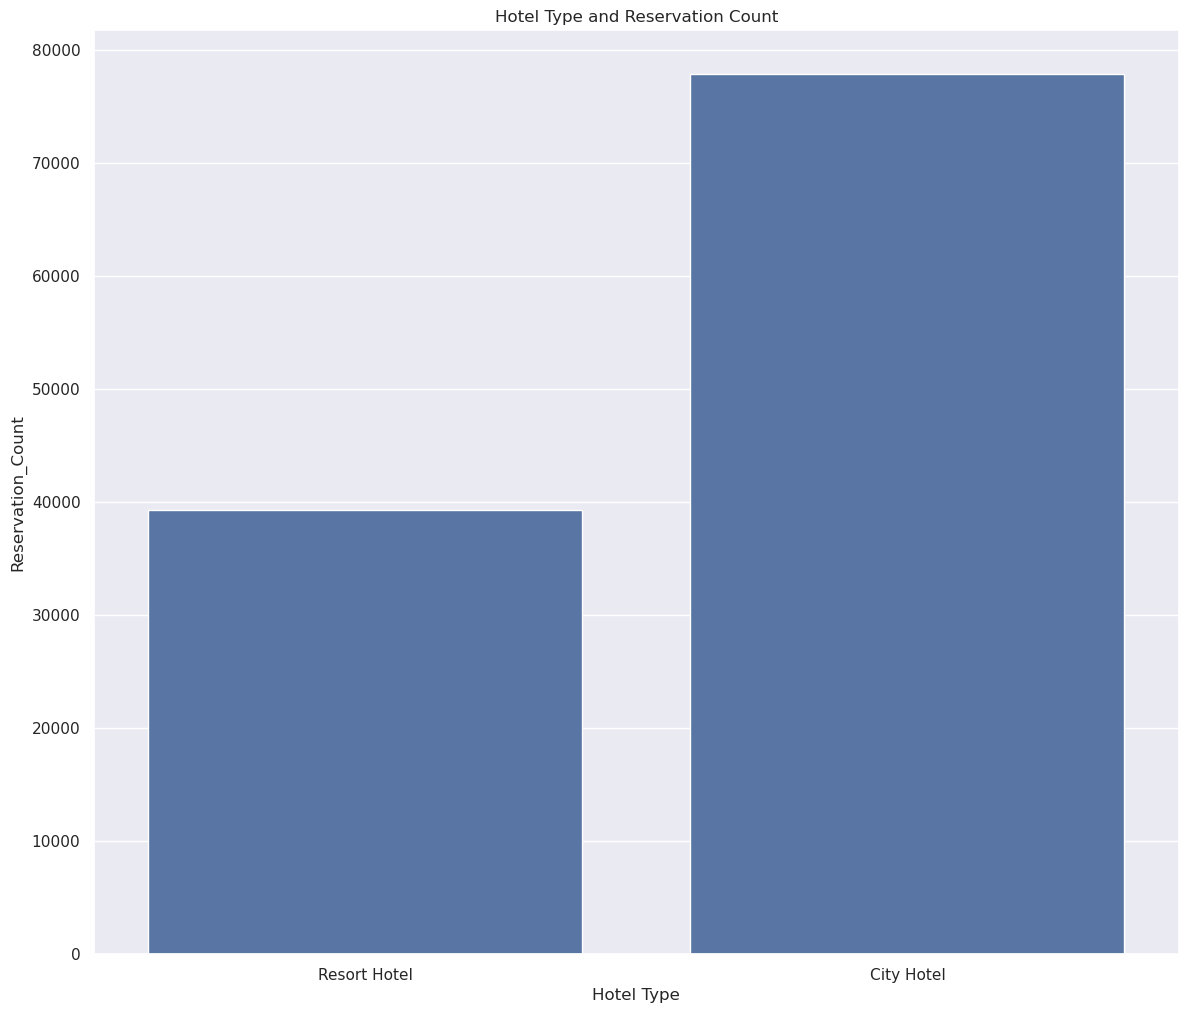

In [39]:
sns.set(rc={"figure.figsize":(14,12)})
graph = sns.countplot(x="hotel",data=df)
graph.set(title="Hotel Type and Reservation Count")
graph.set_xlabel("Hotel Type",fontsize=12)
graph.set_ylabel("Reservation_Count",fontsize=12)

In [40]:
df["hotel"].value_counts(normalize=True)

hotel
City Hotel      0.664565
Resort Hotel    0.335435
Name: proportion, dtype: float64

## Use sns.countplot to obtain Hotel Type and the number of Cancellations/non-cancellations

Text(0, 0.5, 'Reservation Count')

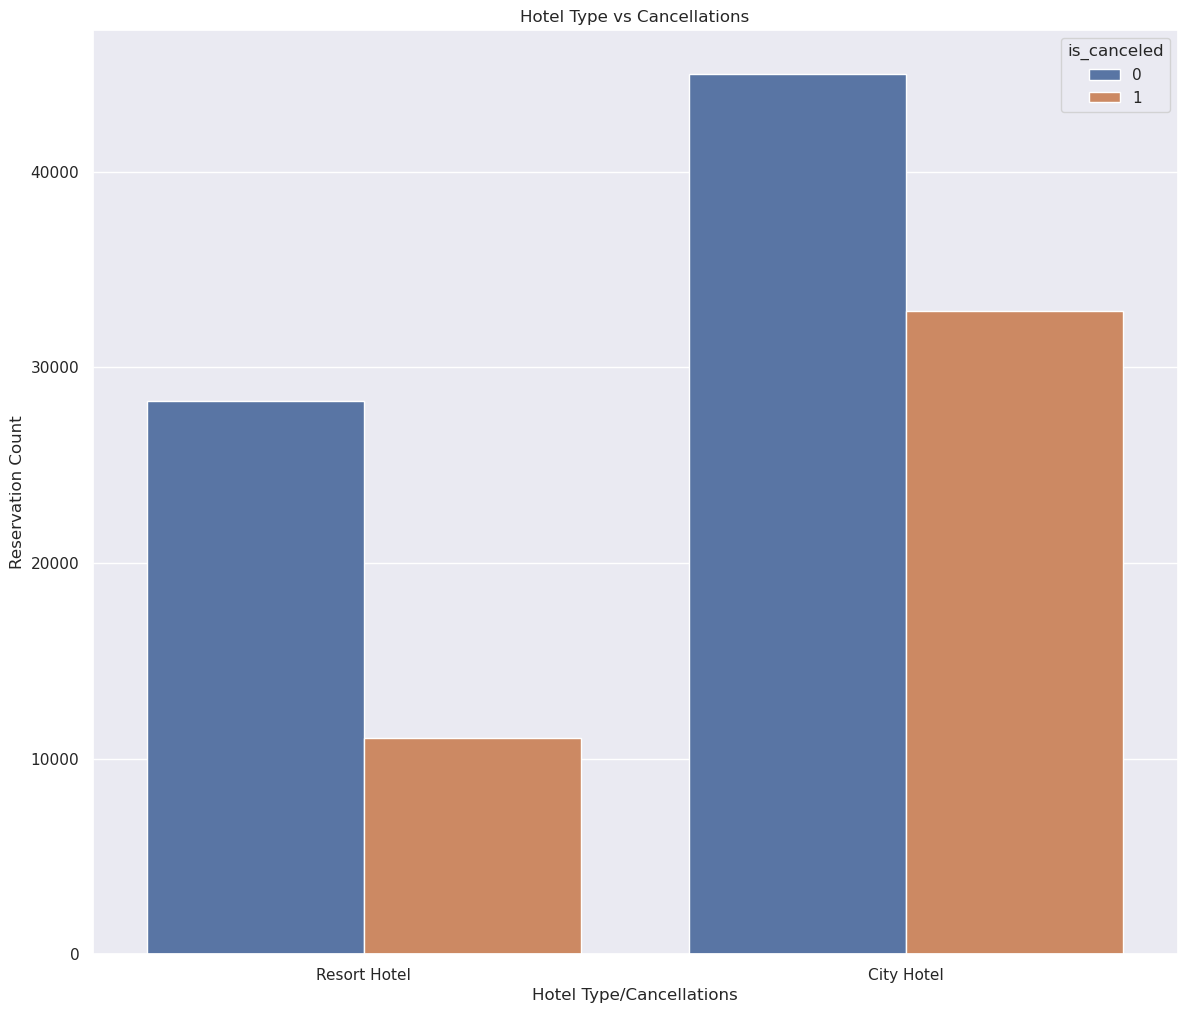

In [43]:
sns.set(rc={'figure.figsize':(14,12)})
graph = sns.countplot(x='hotel',hue='is_canceled',data=df)
graph.set(title='Hotel Type vs Cancellations')
graph.set_xlabel('Hotel Type/Cancellations',fontsize=12)
graph.set_ylabel('Reservation Count',fontsize=12)

Text(0, 0.5, 'Count')

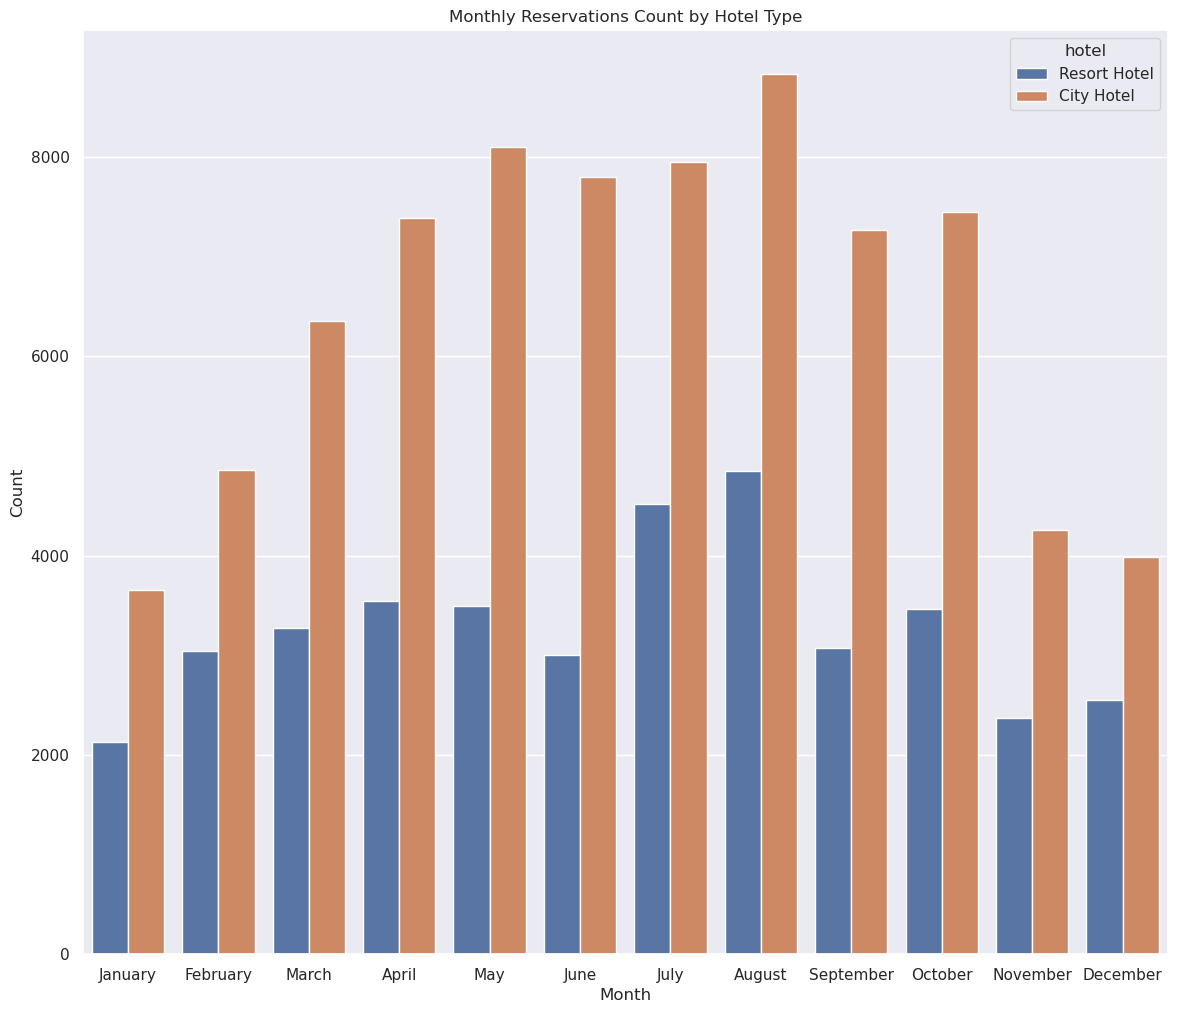

In [46]:
sns.set(rc={'figure.figsize':(14,12)})
graph = sns.countplot(x='arrival_date_month',
                      hue='hotel',
                      data=df,
                      order=['January','February', 'March','April','May','June','July','August','September','October','November','December'])
graph.set(title='Monthly Reservations Count by Hotel Type')
graph.set_xlabel('Month',fontsize=12)
graph.set_ylabel('Count',fontsize=12)

From the chart above, we can see that the hotel stays tend to peak during the month of July and August for both hotels, while in Winter from November to February tend to do the worst

Use sns.countplot to obtain the number of Adults reservings and the number of Families with children reservings

Text(0, 0.5, 'Reservation Count')

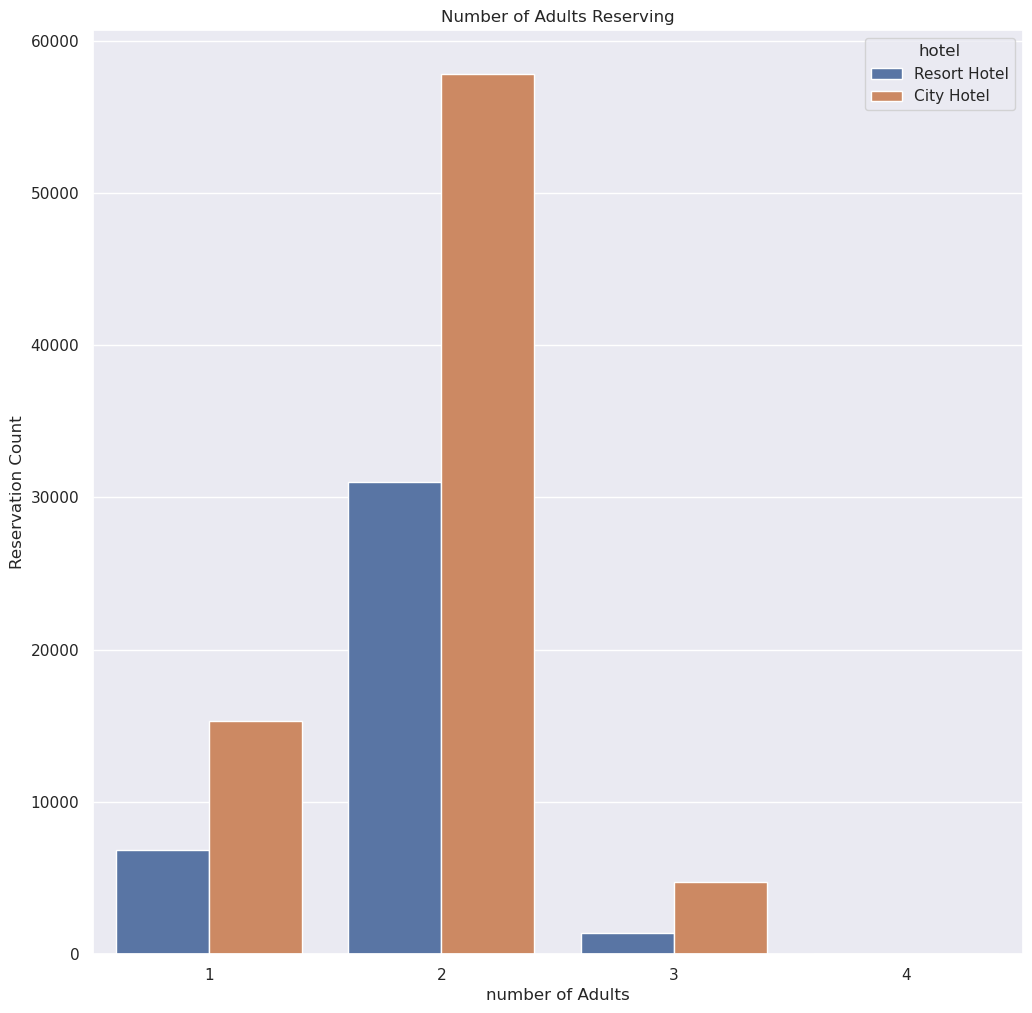

In [48]:
sns.set(rc={'figure.figsize':(12,12)})
graph = sns.countplot(x='adults',hue='hotel',data=df)
graph.set(title='Number of Adults Reserving')
graph.set_xlabel('number of Adults',fontsize=12)
graph.set_ylabel('Reservation Count',fontsize=12)

Text(0, 0.5, 'Reservation Count')

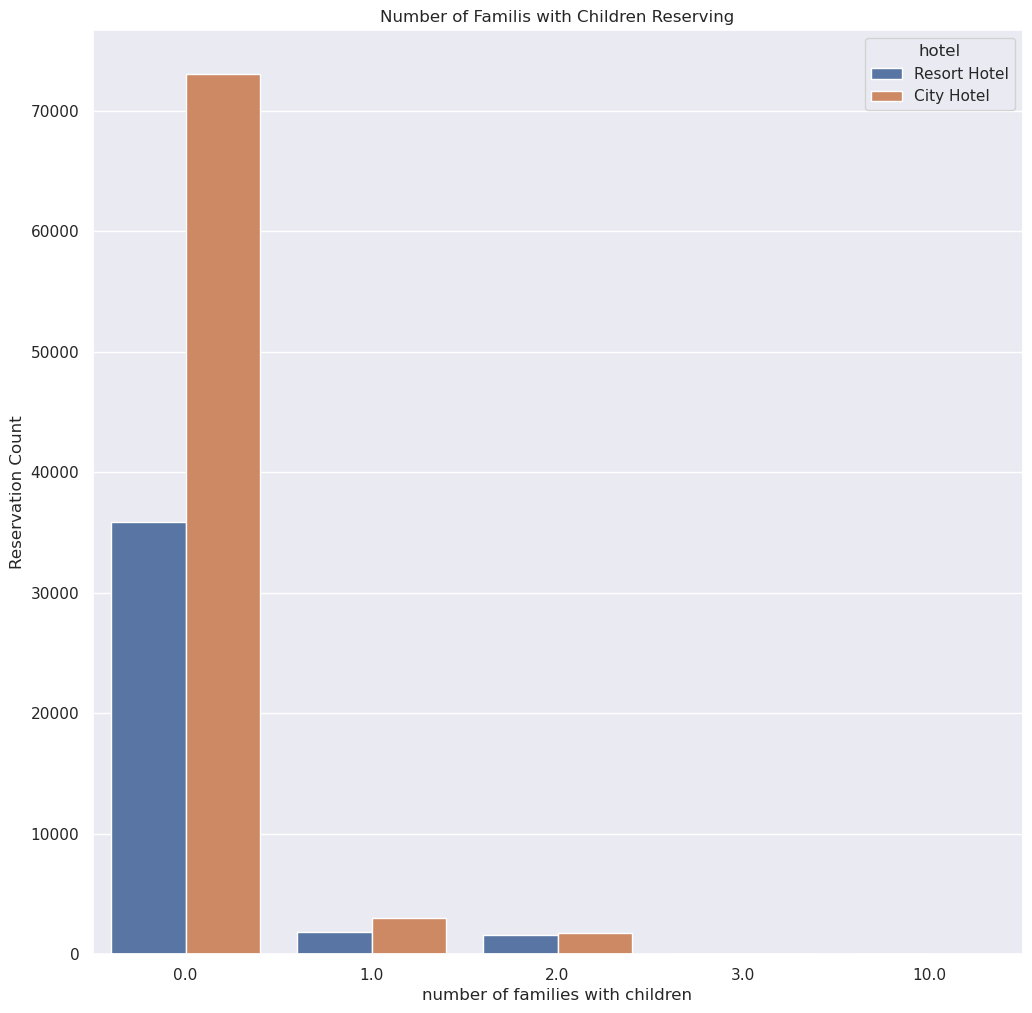

In [49]:
sns.set(rc={'figure.figsize':(12,12)})
graph = sns.countplot(x='children',hue='hotel',data=df)
graph.set(title='Number of Familis with Children Reserving')
graph.set_xlabel('number of families with children',fontsize=12)
graph.set_ylabel('Reservation Count',fontsize=12)

Use Lineplot to get the guests per hotel each month during the entire time period

Text(0, 0.5, 'Total Guest Count')

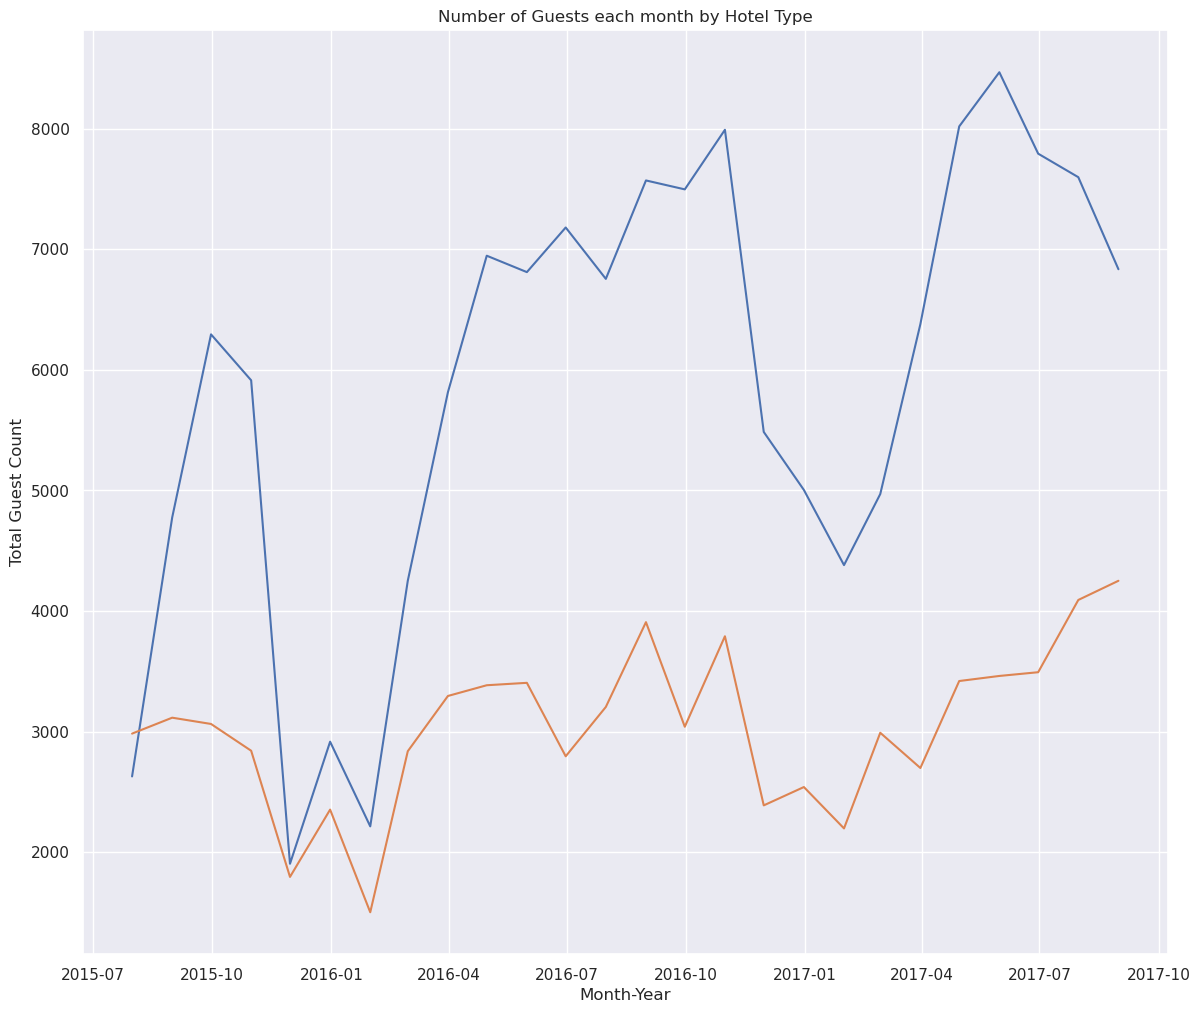

In [58]:
sns.set(rc={'figure.figsize':(14,12)})
fig, ax = plt.subplots()
sns.lineplot(
    data=df[df['hotel']=='City Hotel'].groupby(pd.Grouper(key='arrival_date', axis=0,
                                               freq='ME')).sum().reset_index(),
    x="arrival_date",
    y="total_guests",
    ax=ax
)
sns.lineplot(
    data=df[df['hotel']=='Resort Hotel'].groupby(pd.Grouper(key='arrival_date', axis=0,
                                                 freq='ME')).sum().reset_index(),
    x="arrival_date",
    y="total_guests",
    ax=ax
)
ax.set(title="Number of Guests each month by Hotel Type")
ax.set_xlabel("Month-Year", fontsize =12)
ax.set_ylabel("Total Guest Count", fontsize=12)

We can notice the number of guests coming from the City Hotel is twice than that of Resort Hotel, the graph mirrors closely in terms of the trend.However in Jaan-2016, the number of guests plunged to an all time low before surging back up.

Text(0, 0.5, 'Total Guest Count')

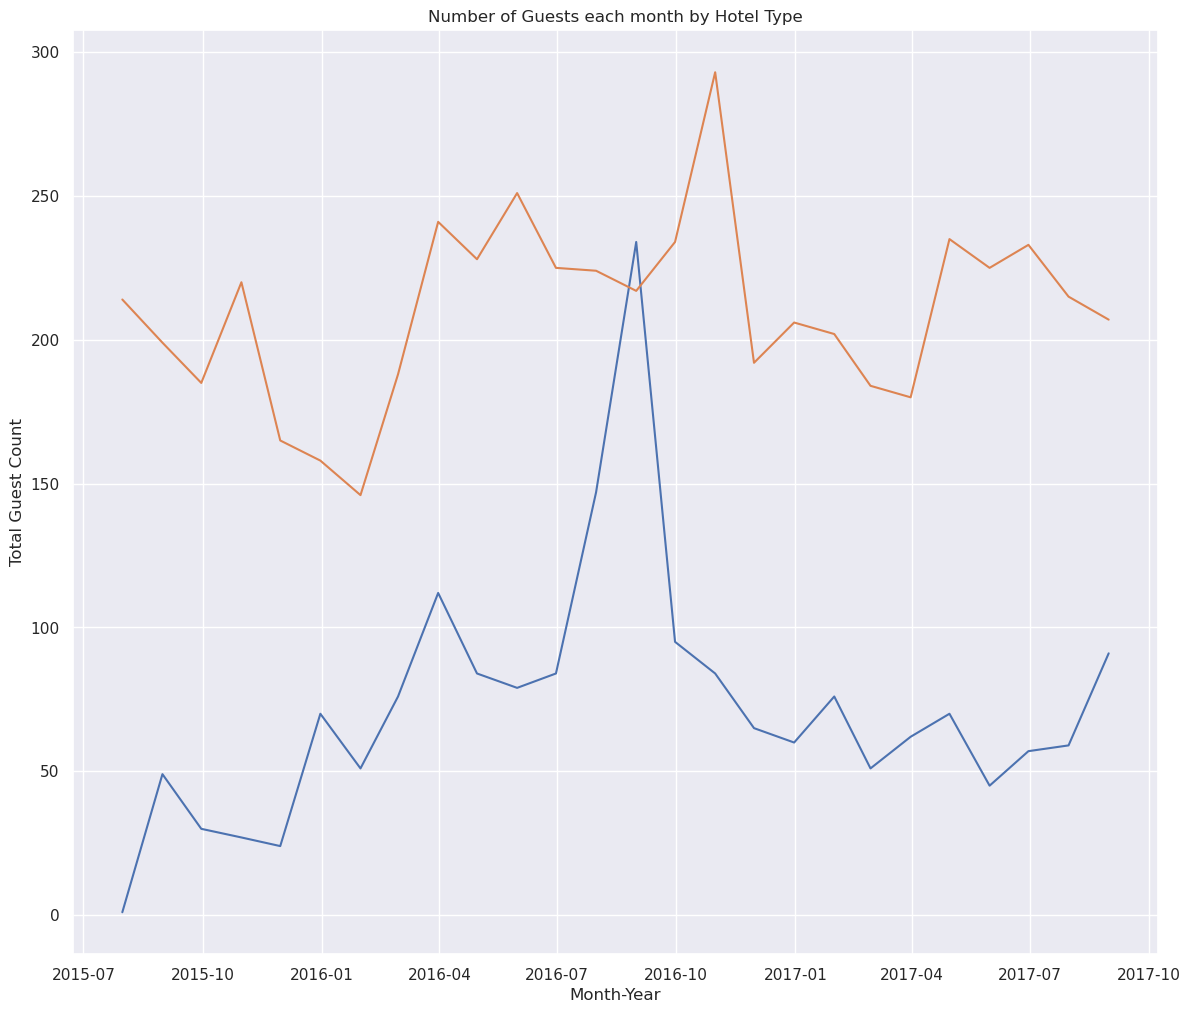

In [59]:
sns.set(rc={'figure.figsize':(14,12)})
fig, ax = plt.subplots()
sns.lineplot(
    data=df[df['hotel']=='City Hotel'].groupby(pd.Grouper(key='arrival_date', axis=0,
                                               freq='ME')).sum().reset_index(),
    x="arrival_date",
    y="required_car_parking_spaces",
    ax=ax
)
sns.lineplot(
    data=df[df['hotel']=='Resort Hotel'].groupby(pd.Grouper(key='arrival_date', axis=0,
                                                 freq='ME')).sum().reset_index(),
    x="arrival_date",
    y="required_car_parking_spaces",
    ax=ax
)
ax.set(title="Number of Guests each month by Hotel Type")
ax.set_xlabel("Month-Year", fontsize =12)
ax.set_ylabel("Total Guest Count", fontsize=12)